In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import plotly.graph_objects as go

In [42]:
df=pd.read_excel("Facebook_Data.xlsx")
df.head().T

0                    1          2  \
Unnamed: 0           Meredith Stransky    Brittney Mazzella    Yi Cook     
Meredith Stransky                      0                    0          0   
Brittney Mazzella                      0                    0          0   
Yi Cook                                0                    0          0   
Porter Devries                         0                    0          0   
...                                  ...                  ...        ...   
Danish                                 0                    0          0   
Matloob                                0                    0          0   
Sameed Shahzad                         0                    0          0   
Frazer                                 0                    1          0   
Mubashir                               0                    0          0   

                                    3                   4  
Unnamed: 0           Porter Devries    Suzanne Syverson    
Meredith Stransky                   0                   0  
Brittney Mazzella                   0                   0  
Yi Cook                             0                   0  
Porter Devries                      0                   0  
...                               ...                 ...  
Danish                              0                   0  
Matloob                             0                   0  
Sameed Shahzad                      0                   0  
Frazer                              0                   0  
Mubashir                            0                   0  

[1001 rows x 5 columns]

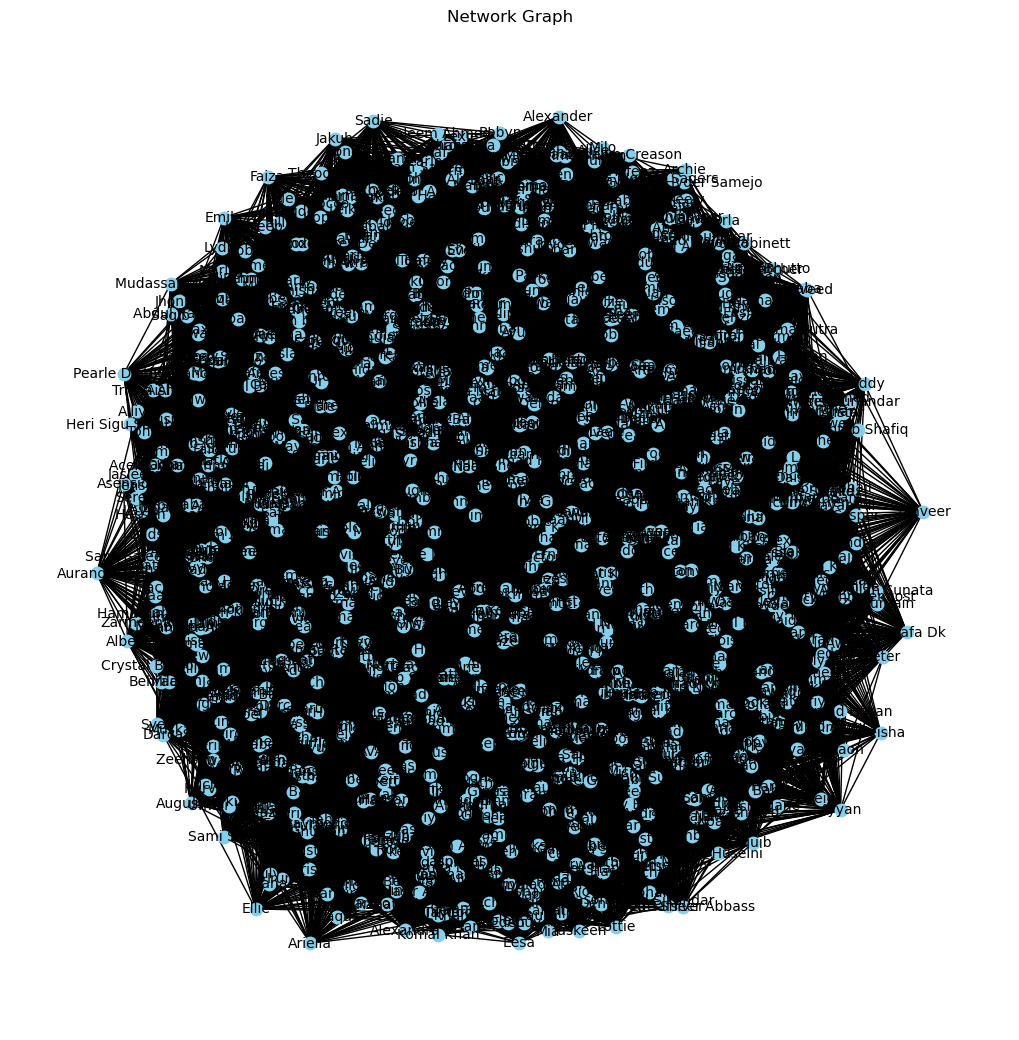

In [57]:
adjacency_matrix = df.iloc[:, 1:].to_numpy()  # Drop first column (labels)
labels = df.iloc[:, 0].values  # Get labels

# Create graph (use `from_numpy_array` instead of deprecated `from_numpy_matrix`)
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.Graph)  # or nx.DiGraph

# Relabel nodes (optional, if first column contains names)
G = nx.relabel_nodes(G, dict(enumerate(labels)))

# Visualize
plt.figure(figsize=(10, 10))
nx.draw(
    G, 
    with_labels=True, 
    node_color="skyblue", 
    node_size=80, 
    font_size=10
)
plt.title("Network Graph")
plt.show()

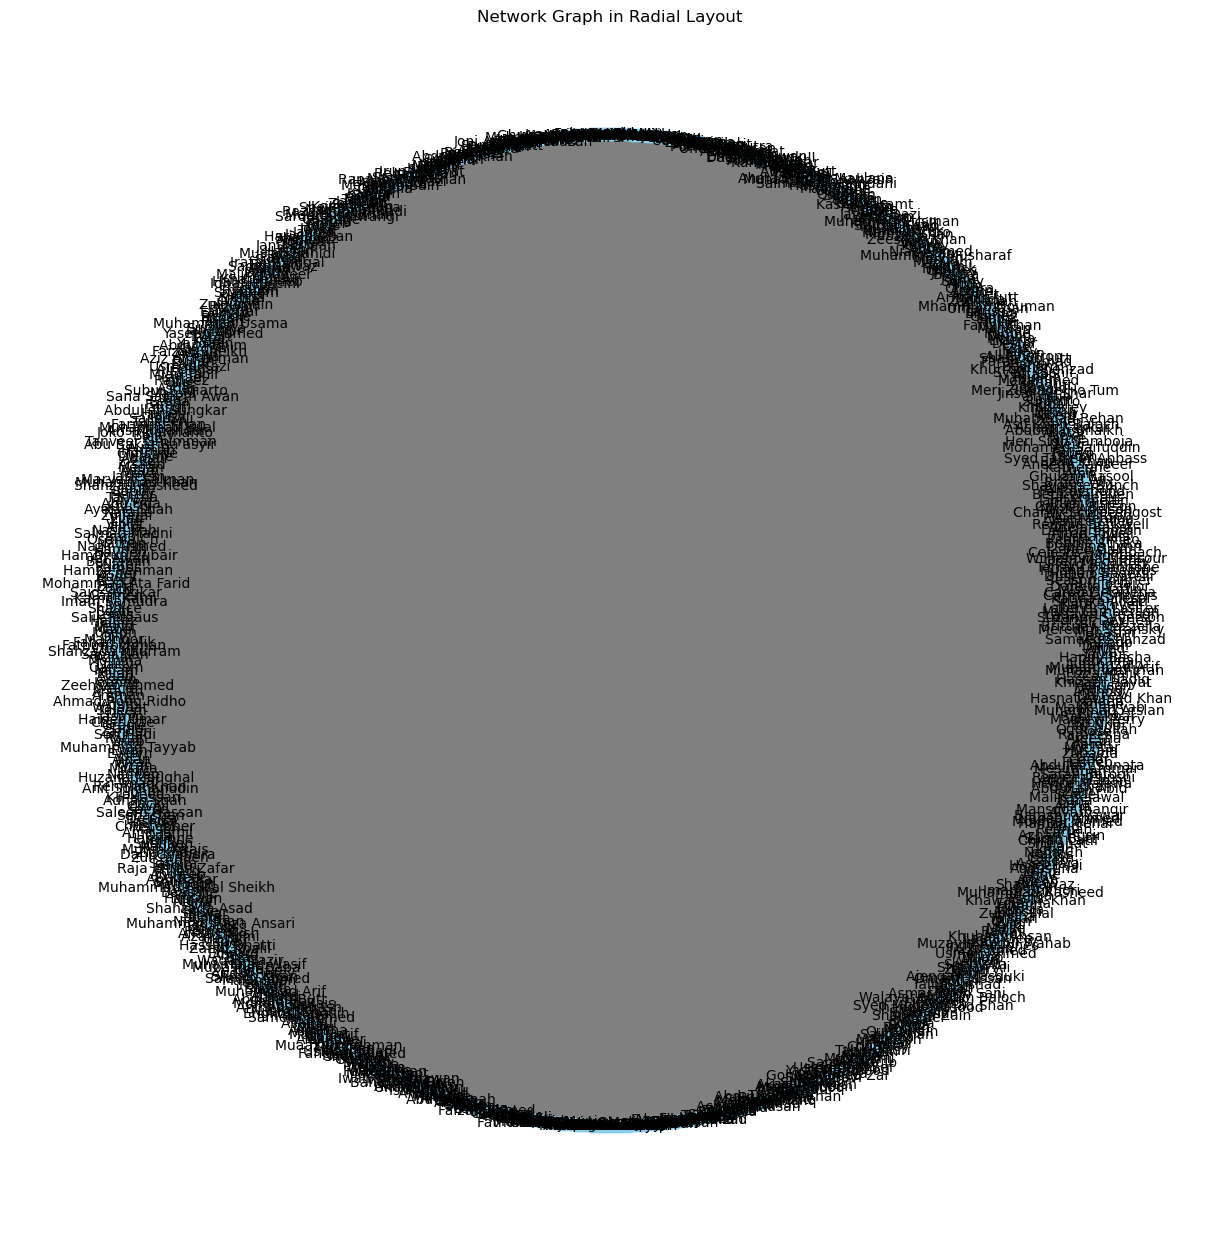

In [97]:

adjacency_matrix = df.iloc[:, 1:].to_numpy() 
labels = df.iloc[:, 0].values  # Get labels


G = nx.from_numpy_array(adjacency_matrix, create_using=nx.Graph) 

# Relabel nodes (optional
G = nx.relabel_nodes(G, dict(enumerate(labels)))

# Define a radial layout
def radial_layout(G, radius=1):
    pos = {}
    n = len(G)
    angle_gap = 2 * np.pi / n
    for i, node in enumerate(G.nodes()):
        angle = i * angle_gap
        pos[node] = (radius * np.cos(angle), radius * np.sin(angle))
    return pos

# Visualize the graph using the radial layout
plt.figure(figsize=(12, 12))

# Use radial layout for visualization
pos = radial_layout(G, radius=1.5)

# Draw the graph
nx.draw(
    G, 
    pos=pos, 
    with_labels=True, 
    node_color="skyblue", 
    node_size=80, 
    font_size=10,
    edge_color="gray",  
    width=0.5  
)

plt.title("Network Graph in Radial Layout")
plt.show()


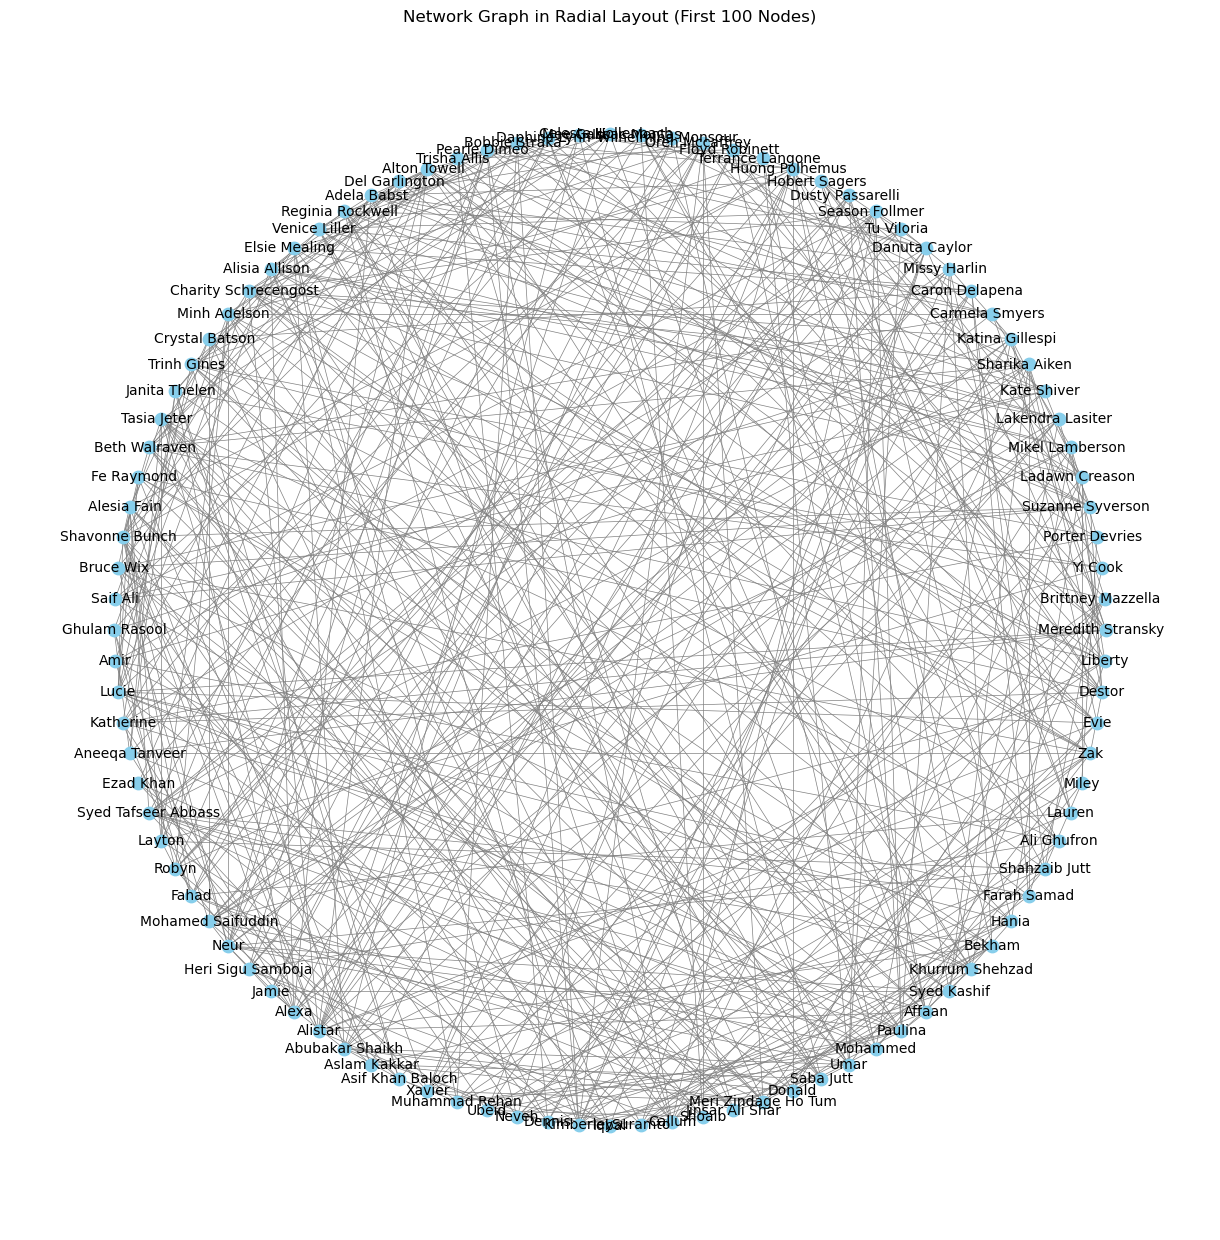

In [98]:


adjacency_matrix = df.iloc[:100, 1:101].to_numpy()  
labels = df.iloc[:100, 0].values  

# Create graph 
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.Graph)  # or nx.DiGraph

# Relabel nodes
G = nx.relabel_nodes(G, dict(enumerate(labels)))

# Define a radial layout
def radial_layout(G, radius=1):
    pos = {}
    n = len(G)
    angle_gap = 2 * np.pi / n
    for i, node in enumerate(G.nodes()):
        angle = i * angle_gap
        pos[node] = (radius * np.cos(angle), radius * np.sin(angle))
    return pos

# Visualize the graph
plt.figure(figsize=(12, 12))

# Use radial layout for visualization
pos = radial_layout(G, radius=1.5)

# Draw the graph
nx.draw(
    G, 
    pos=pos, 
    with_labels=True, 
    node_color="skyblue", 
    node_size=80, 
    font_size=10,
    edge_color="gray",  
    width=0.5  
)

plt.title("Network Graph in Radial Layout (First 100 Nodes)")
plt.show()


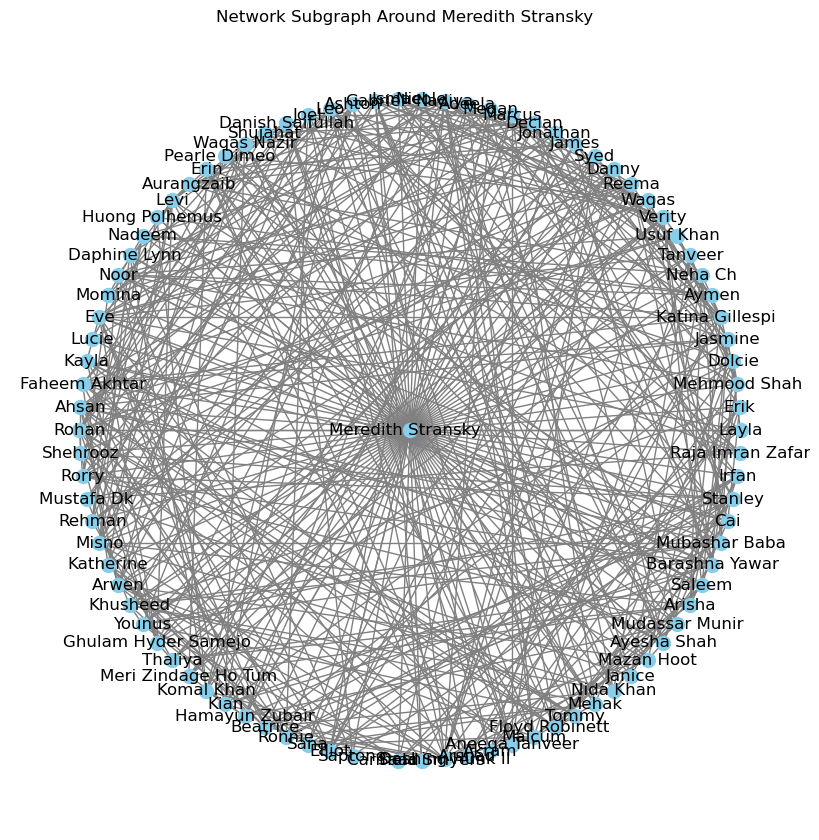

In [84]:
adjacency_matrix = df.iloc[:, 1:].to_numpy()  # Drop first column (labels)
labels = df.iloc[:, 0].values  # Get labels

# Create graph
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.Graph)


G = nx.relabel_nodes(G, dict(enumerate(labels)))

# Select a person/node to focus on 
center_node = labels[0] 

# Get the neighbors of the selected node
neighbors = list(G.neighbors(center_node)) + [center_node]  

# Create a subgraph around the selected node
subgraph = G.subgraph(neighbors)

# Define a layout around the central node
def radial_layout(G, center_node, radius=1):
    pos = {}
    angle_gap = 2 * np.pi / len(G.nodes())
    for i, node in enumerate(G.nodes()):
        angle = i * angle_gap
        if node == center_node:
            pos[node] = (0, 0)  # Place the center node at the origin
        else:
            pos[node] = (radius * np.cos(angle), radius * np.sin(angle)) 
    return pos

# Visualize the subgraph
plt.figure(figsize=(8, 8))

# Use radial layout for visualization of subgraph
pos = radial_layout(subgraph, center_node, radius=1.5)

# Draw the subgraph
nx.draw(
    subgraph, 
    pos=pos, 
    with_labels=True, 
    node_color="skyblue", 
    node_size=100, 
    font_size=12,
    edge_color="gray",  
    width=1  
)

plt.title(f"Network Subgraph Around {center_node}")
plt.show()


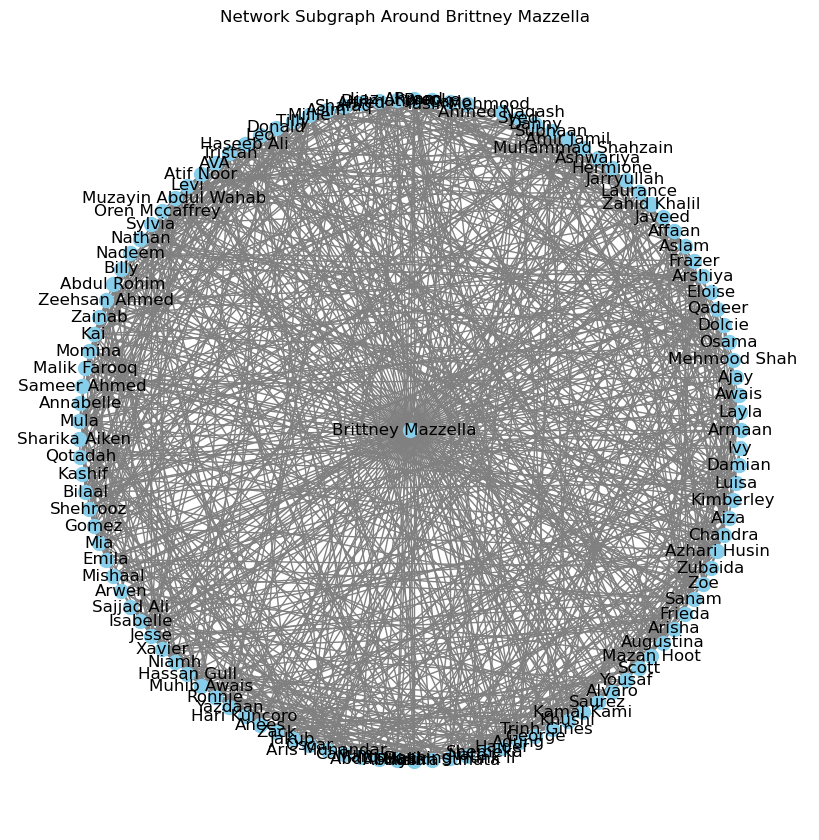

In [87]:
adjacency_matrix = df.iloc[:, 1:].to_numpy()  # Drop first column (labels)
labels = df.iloc[:, 0].values  # Get labels

# Create graph
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.Graph)


G = nx.relabel_nodes(G, dict(enumerate(labels)))

# Select a person/node to focus on 
center_node = labels[1] 

# Get the neighbors of the selected node
neighbors = list(G.neighbors(center_node)) + [center_node]  

# Create a subgraph around the selected node
subgraph = G.subgraph(neighbors)

# Define a layout around the central node
def radial_layout(G, center_node, radius=1):
    pos = {}
    angle_gap = 2 * np.pi / len(G.nodes())
    for i, node in enumerate(G.nodes()):
        angle = i * angle_gap
        if node == center_node:
            pos[node] = (0, 0)  # Place the center node at the origin
        else:
            pos[node] = (radius * np.cos(angle), radius * np.sin(angle)) 
    return pos

# Visualize the subgraph
plt.figure(figsize=(8, 8))

# Use radial layout for visualization of subgraph
pos = radial_layout(subgraph, center_node, radius=1.5)

# Draw the subgraph
nx.draw(
    subgraph, 
    pos=pos, 
    with_labels=True, 
    node_color="skyblue", 
    node_size=100, 
    font_size=12,
    edge_color="gray",  
    width=1  
)

plt.title(f"Network Subgraph Around {center_node}")
plt.show()

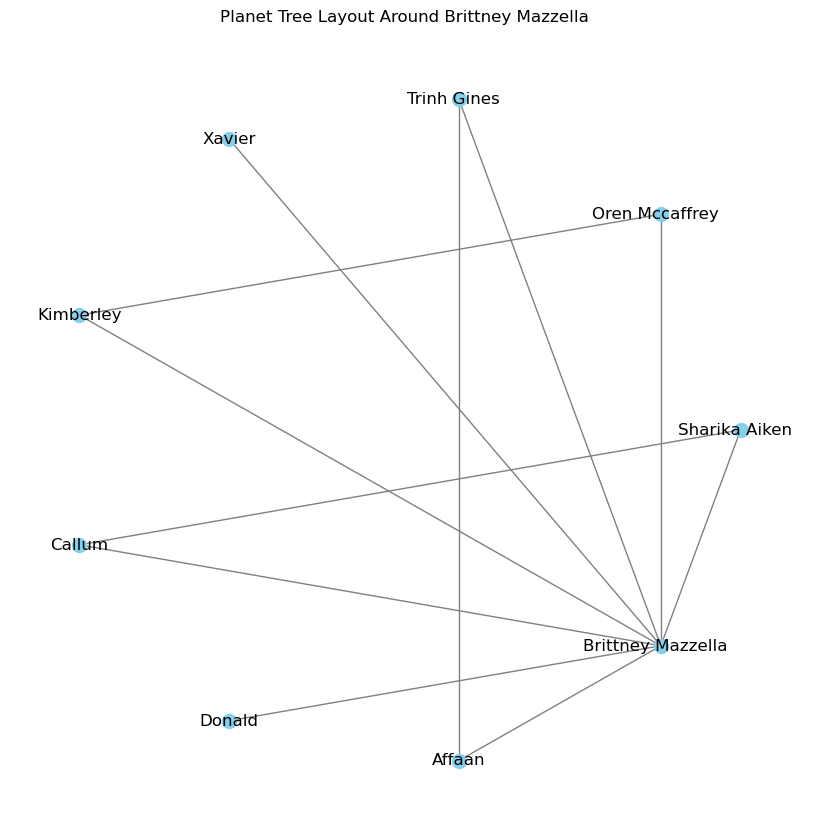

In [99]:

adjacency_matrix = df.iloc[:100, 1:101].to_numpy() 
labels = df.iloc[:100, 0].values 

# Create graph
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.Graph)


G = nx.relabel_nodes(G, dict(enumerate(labels)))

center_node = labels[1]  

# Get the neighbors of the selected node
neighbors = list(G.neighbors(center_node)) + [center_node]  

# Create a subgraph around the selected node 
subgraph = G.subgraph(neighbors)

# Define a radial layout 
def planet_tree_layout(G, center_node, radius=1):
    pos = {}
    level_gap = 1.5 
    
    # Position center node
    pos[center_node] = (0, 0)
    
    
    levels = {center_node: 0}
    for depth, node in enumerate(neighbors):
        levels[node] = 1 

    # Compute position for each node in each level
    angle_gap = 2 * np.pi / len(neighbors) 
    for i, node in enumerate(neighbors):
        if levels[node] == 1:
            angle = i * angle_gap
            pos[node] = (radius * np.cos(angle), radius * np.sin(angle))
    
    return pos

# Visualize the subgraph 
plt.figure(figsize=(8, 8))

# Use planet-tree layout 
pos = planet_tree_layout(subgraph, center_node, radius=1.5)


# Draw the subgraph
nx.draw(
    subgraph, 
    pos=pos, 
    with_labels=True, 
    node_color="skyblue", 
    node_size=100, 
    font_size=12,
    edge_color="gray",  # Optional, to make edges more visible
    width=1  # Optional, adjust edge thickness
)

plt.title(f"Planet Tree Layout Around {center_node}")
plt.show()


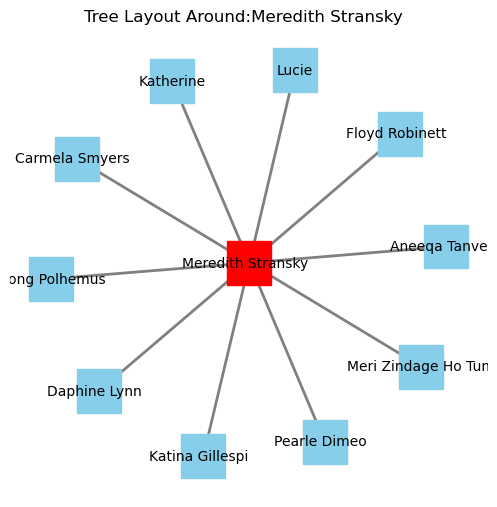

In [100]:

adjacency_matrix = df.iloc[:100, 1:101].to_numpy()  
labels = df.iloc[:100, 0].values 

# Create graph
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.Graph)

# Relabel nodes with actual labels
G = nx.relabel_nodes(G, dict(enumerate(labels)))

center_node = labels[0] 

neighbors = list(G.neighbors(center_node)) + [center_node]  

# Create a subgraph around the selected node
subgraph = G.subgraph(neighbors)

# Tree Layout Visualization 
def tree_layout(G):
    pos = nx.spring_layout(G, seed=42)
    return pos

# Visualize the subgraph 
plt.figure(figsize=(10, 10))

# Tree Layout Visualization
pos_tree = tree_layout(subgraph)

node_colors = ["red" if node == center_node else "skyblue" for node in subgraph.nodes()]

# Draw the subgraph
plt.subplot(224)
nx.draw(
    subgraph, 
    pos=pos_tree, 
    with_labels=True, 
    node_color=node_colors,
    node_shape='s',
    node_size=1000, 
    font_size=10,
    edge_color="gray", 
    width=2
)
plt.title(f"Tree Layout Around:{center_node}")

plt.tight_layout()
plt.show()


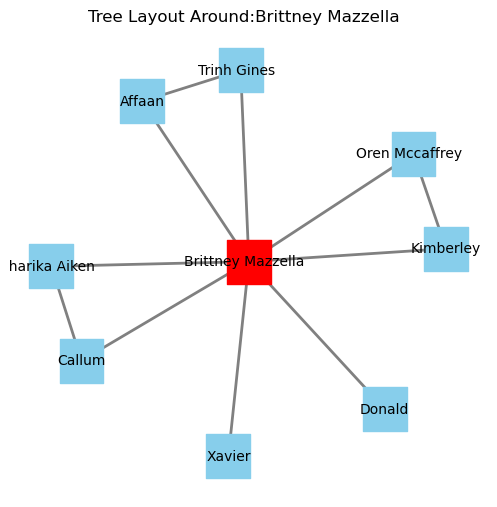

In [101]:

adjacency_matrix = df.iloc[:100, 1:101].to_numpy()  
labels = df.iloc[:100, 0].values 

# Create graph
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.Graph)

# Relabel nodes with actual labels
G = nx.relabel_nodes(G, dict(enumerate(labels)))

center_node = labels[1] 

neighbors = list(G.neighbors(center_node)) + [center_node]  

# Create a subgraph around the selected node
subgraph = G.subgraph(neighbors)

# Tree Layout Visualization 
def tree_layout(G):
    pos = nx.spring_layout(G, seed=42)
    return pos

# Visualize the subgraph 
plt.figure(figsize=(10, 10))

# Tree Layout Visualization
pos_tree = tree_layout(subgraph)

node_colors = ["red" if node == center_node else "skyblue" for node in subgraph.nodes()]

# Draw the subgraph
plt.subplot(224)
nx.draw(
    subgraph, 
    pos=pos_tree, 
    with_labels=True, 
    node_color=node_colors,
    node_shape='s',
    node_size=1000, 
    font_size=10,
    edge_color="gray", 
    width=2
)
plt.title(f"Tree Layout Around:{center_node}")

plt.tight_layout()
plt.show()